In [2]:
from sklearn.linear_model import LogisticRegression
from descriptors import *
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
imgs, labels = load_image()
data_hist = histogram(imgs)


# Classification par histogramme de couleurs

Voici la matrice de confusion obtenue avec le modèle de `LogisticRegression` :


Histogram


/home/nicolas/Etude/amvo/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.555


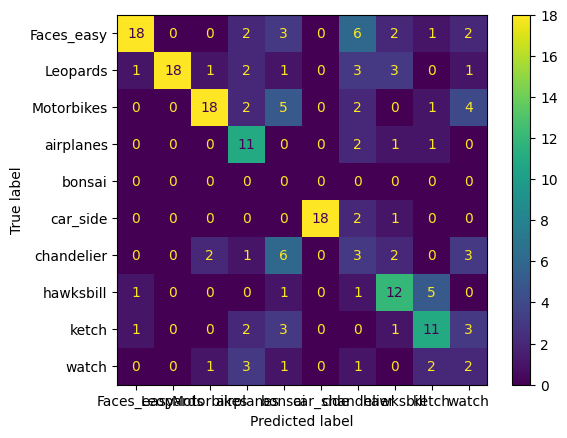

In [7]:
print("Histogram")
acc, conf = process_train_test(data_hist, labels)
print(f"Accuracy: {acc}")
disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=np.unique(labels))
disp.plot()
plt.show()

La classes pour laquelles la reconnaissance est la plus précise est `car_side`\
La classes pour laquelles la reconnaissance est la plus faible est `watch` ou `bonsai`.\
La classes la plus confondues sont `Motorbikes` en `watch`.

On peut supposer qu'il confond la classe `Motorbikes` en `watch`, car les images de `Motorbikes` sont sous fond blanc et certaines de `watch` aussi.

# Classification par histogramme LBP

Voici la matrice de confusion obtenue avec le modèle de `LogisticRegression` :

/home/nicolas/Etude/amvo/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.345


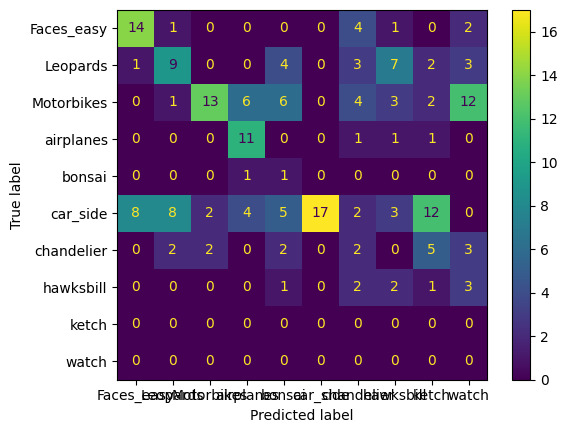

In [8]:
data_lbp = LBP(imgs)
acc, conf = process_train_test(data_lbp, labels)
print(f"Accuracy: {acc}")
disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=np.unique(labels))
disp.plot()
plt.show()

Les classes les mieux reconnaissance sont `Motorbikes` et `car_side`.\
Les classes significativement moins reconnu sont `bonsai`, `chandelier`, `hawksbill`, `ketch` et `watch`.\
On remarque qu'avec l'histogramme de couleurs, on obtient de meilleurs résultats.\
On peut supposer que la couleurs est une information importante pour la reconnaissance sur ce dataset.

# Fusion de descripteurs

La taille final du descriptor est le somme des tailles de chaque descripteur.

/home/nicolas/Etude/amvo/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.64


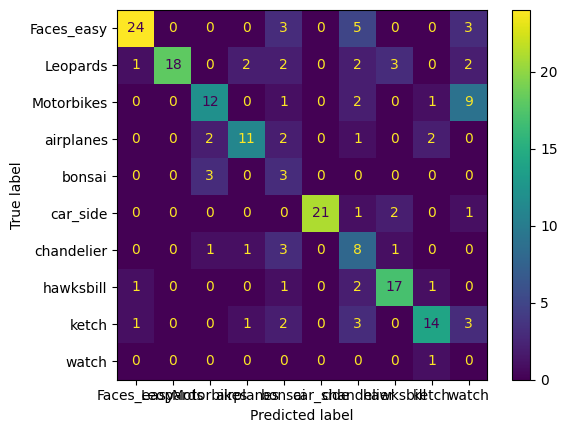

In [9]:
fusion = np.hstack((data_hist, data_lbp))
acc, conf = process_train_test(fusion, labels)
print(f"Accuracy: {acc}")
disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=np.unique(labels))
disp.plot()

Voici les differents accuracy obtenus:

- Histogramme de couleurs : 0.545
- LBP: 0.39
- Fusion: 0.55

On peut supposer que grâce à la fusion des descripteurs, on obtient de meilleurs résultats. Car on garde l'information sur les couleurs, en plus de l'information de la forme.

# Découpage géométrique des images

/home/nicolas/Etude/amvo/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.735


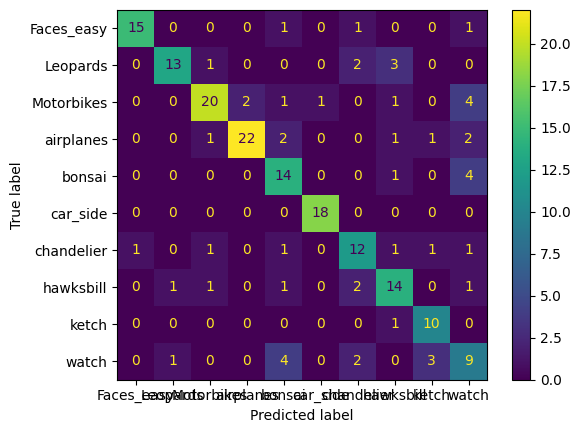

In [10]:
data_geo = geometric_split(imgs, histogram, nb_split=5)
acc, conf = process_train_test(data_geo, labels)
print(f"Accuracy: {acc}")
disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=np.unique(labels))
disp.plot()